In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder


### 1. Load dataset

In [ ]:
file_id = "16Yg-rMcVEOJ57pN6z-LFaHK4YrXSin__"
url = f"https://drive.google.com/uc?id={file_id}"
df = pd.read_pickle(url)
df.head()

,Date,Block,Primary Type,Location Description,District,Ward,Community Area,Latitude,Longitude,DateTime,Hour,is_Holiday,PRCP,SNOW,TAVG
0,2024-10-18,051XX S HOMAN AVE,OFFENSE INVOLVING CHILDREN,RESIDENCE,8,14,63,41.799867,-87.708644,1.729210e+09,0,False,0.0,0.0,12.6
1,2024-10-10,091XX S EGGLESTON AVE,MOTOR VEHICLE THEFT,STREET,22,9,73,41.728316,-87.634933,1.728518e+09,0,False,0.0,0.0,16.5
2,2024-10-10,009XX N LAWNDALE AVE,DECEPTIVE PRACTICE,APARTMENT,11,27,23,41.897826,-87.71883,1.728518e+09,0,False,0.0,0.0,16.5
3,2024-10-10,045XX N CLARENDON AVE,CRIMINAL DAMAGE,STREET,19,46,3,41.96388,-87.649971,1.728518e+09,0,False,0.0,0.0,16.5
4,2024-10-10,108XX S CALHOUN AVE,BATTERY,APARTMENT,4,10,51,41.698661,-87.561961,1.728518e+09,0,False,0.0,0.0,16.5


### 2. Statistics

#### 2.1 Data Description

Below is the table of dataset statistics. There is no missing data problems.
There are a total of 31 labels ('Primary Type')


In [ ]:
df.head()
df.describe(include='all')

,Date,Block,Primary Type,Location Description,District,Ward,Community Area,Latitude,Longitude,DateTime,Hour,is_Holiday,PRCP,SNOW,TAVG
count,201096,201096,201096,200310,201096.0,201096.0,201096.0,200998.0000,200998.000000,2.010960e+05,201096.0,201096,201096.000000,201096.000000,201096.000000
unique,NaN,27035,31,123,23.0,50.0,77.0,103098.0000,103088.000000,NaN,24.0,2,NaN,NaN,NaN
top,NaN,001XX N STATE ST,THEFT,STREET,8.0,27.0,25.0,41.8835,-87.627877,NaN,0.0,False,NaN,NaN,NaN
freq,NaN,539,46743,55102,13388.0,9221.0,9931.0,270.0000,270.000000,NaN,13145.0,195730,NaN,NaN,NaN
mean,2024-05-24 19:08:29.559613696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.716624e+09,NaN,NaN,2.500800,1.349873,15.182945
min,2024-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.704067e+09,NaN,NaN,0.000000,0.000000,-21.600000
25%,2024-03-17 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.710635e+09,NaN,NaN,0.000000,0.000000,6.400000
50%,2024-05-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.716890e+09,NaN,NaN,0.000000,0.000000,18.500000
75%,2024-08-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.722551e+09,NaN,NaN,1.000000,0.000000,23.200000
max,2024-10-18 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.729210e+09,NaN,NaN,41.700000,119.000000,30.900000


#### 2.2 Label Bias

In this section, we evaluate the distribution of the label "Primary Type". It is shown that the primary type is highly biased. Theft, battery, and criminal damage account for more than 50% of crimes.

Primary Type
THEFT                                0.232441
BATTERY                              0.179889
CRIMINAL DAMAGE                      0.110887
ASSAULT                              0.092140
MOTOR VEHICLE THEFT                  0.086063
OTHER OFFENSE                        0.065765
DECEPTIVE PRACTICE                   0.058281
ROBBERY                              0.035555
WEAPONS VIOLATION                    0.032666
BURGLARY                             0.031075
NARCOTICS                            0.022203
CRIMINAL TRESPASS                    0.018797
OFFENSE INVOLVING CHILDREN           0.006609
CRIMINAL SEXUAL ASSAULT              0.006082
SEX OFFENSE                          0.004774
PUBLIC PEACE VIOLATION               0.003978
INTERFERENCE WITH PUBLIC OFFICER     0.002665
HOMICIDE                             0.002297
STALKING                             0.001900
ARSON                                0.001880
PROSTITUTION                         0.001124
CONCEALED CARRY LICEN

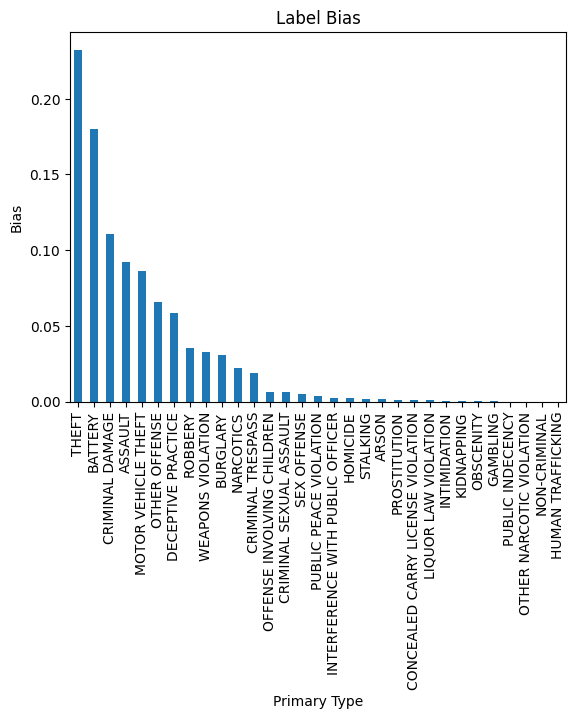

In [ ]:
df['Primary Type'].value_counts(normalize=True).plot(kind='bar')
print(df['Primary Type'].value_counts(normalize=True))
plt.title('Label Bias')
plt.ylabel('Bias')
plt.xlabel('Primary Type')
plt.show()

 Lots of crimes  are concentrated in specific locations, particularly on streets, in apartments, and residences, indicating a clear location-based bias in the data.

Top 10 Locations by Percentage:
Location Description
STREET                                    27.508362
APARTMENT                                 18.772902
RESIDENCE                                 11.723329
SIDEWALK                                   5.496980
SMALL RETAIL STORE                         3.773651
PARKING LOT / GARAGE (NON RESIDENTIAL)     3.464630
RESTAURANT                                 2.394289
ALLEY                                      2.393790
DEPARTMENT STORE                           2.162648
OTHER (SPECIFY)                            1.572063
Name: proportion, dtype: float64


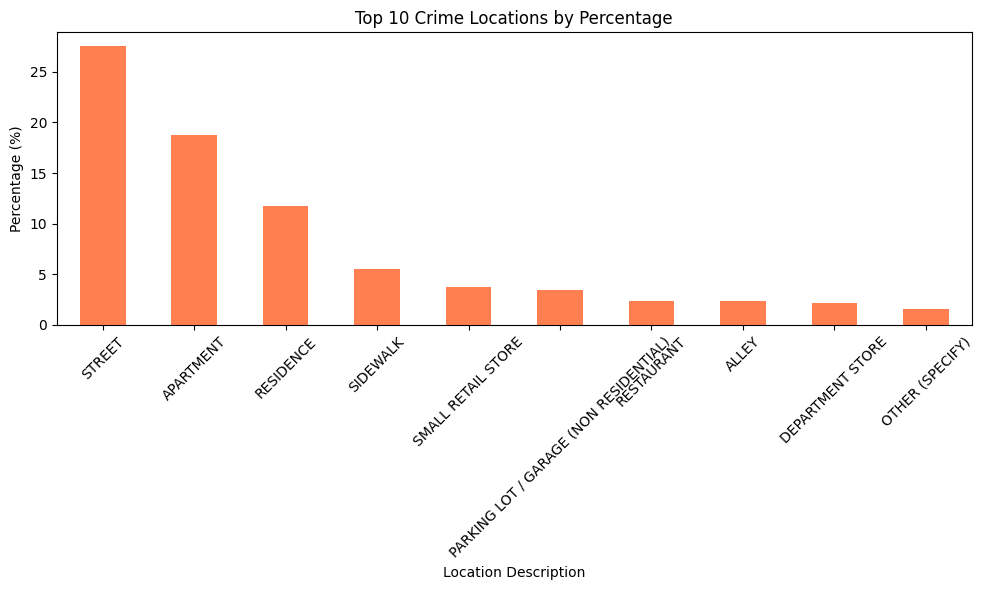

In [ ]:
location_distribution = df['Location Description'].value_counts(normalize=True) * 100

print("Top 10 Locations by Percentage:")
print(location_distribution.head(10))

plt.figure(figsize=(10, 6))
location_distribution.head(10).plot(kind='bar', color='coral')
plt.title('Top 10 Crime Locations by Percentage')
plt.xlabel('Location Description')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 2.3 Weather related feature

In this section, we presents the weather-related data input. It is shown that crimes mostly happen during warm day without precipitation and snow

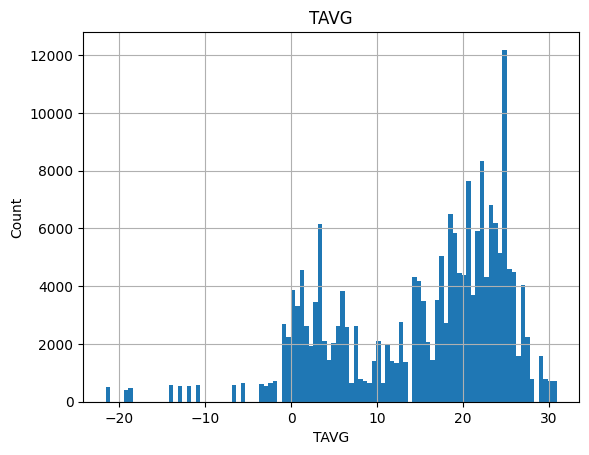

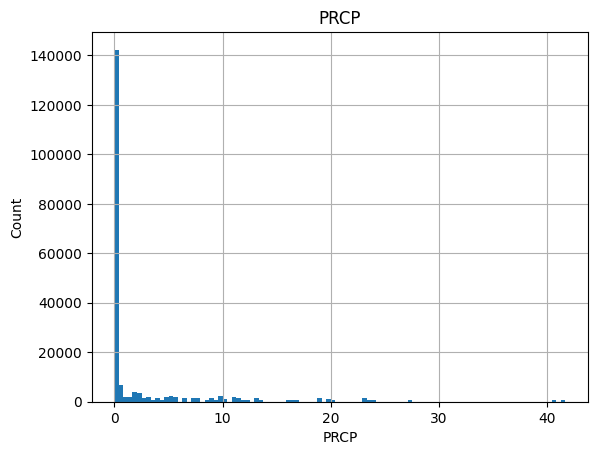

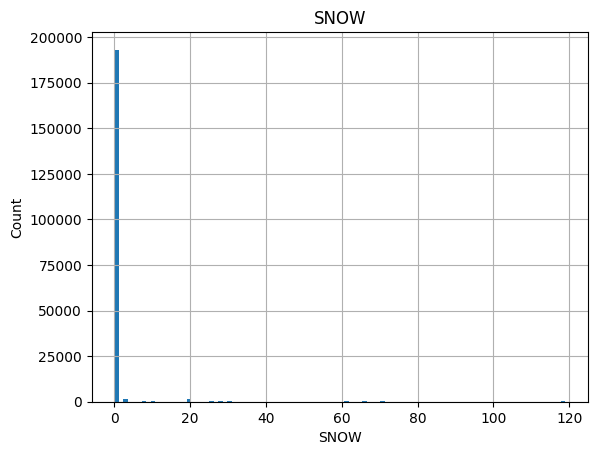

In [ ]:
for feature in ['TAVG','PRCP','SNOW']:
    df[feature].hist(bins=100)
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

Below plots show that the primary type distribution is indepedant of snow and precipitation

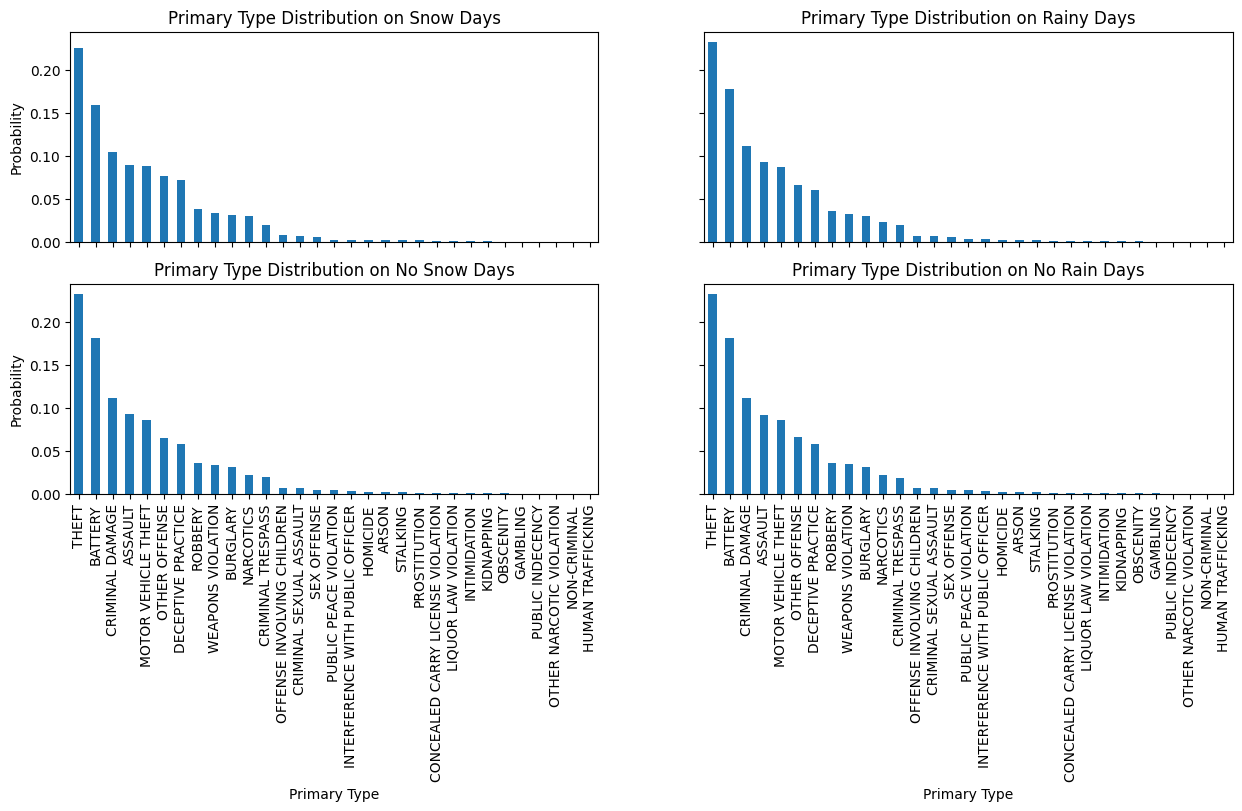

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 6), sharex=True, sharey=True)
snow_days = df[df['SNOW'] > 0]
snow_days['Primary Type'].value_counts(normalize=True).plot(kind='bar',ax=ax[0,0])
ax[0,0].set_title('Primary Type Distribution on Snow Days')
ax[0,0].set_ylabel('Probability')
ax[0,0].set_xlabel('Primary Type')

no_snow_days = df[df['SNOW'] == 0]
no_snow_days['Primary Type'].value_counts(normalize=True).plot(kind='bar', ax=ax[1,0])
ax[1,0].set_title('Primary Type Distribution on No Snow Days')
ax[1,0].set_ylabel('Probability')
ax[1,0].set_xlabel('Primary Type')

rainy_days = df[df['PRCP'] > 0]
rainy_days['Primary Type'].value_counts(normalize=True).plot(kind='bar',ax=ax[0,1])
ax[0,1].set_title('Primary Type Distribution on Rainy Days')
ax[0,1].set_ylabel('Probability')
ax[0,1].set_xlabel('Primary Type')

rainy_days = df[df['PRCP'] == 0]
rainy_days['Primary Type'].value_counts(normalize=True).plot(kind='bar', ax=ax[1,1])
ax[1,1].set_title('Primary Type Distribution on No Rain Days')
ax[1,1].set_ylabel('Probability')
ax[1,1].set_xlabel('Primary Type')
plt.show()

#### 2.4 Community area, ward, and district

In this section, we present the distribution of crimes over various community areas, wards and districts. We also investigated the distribution of individual crime type at each community area/ward/district (for visualization, only top 10 crime types are selected). It is shown that the dominant crime type changes across the community area/ward/district.

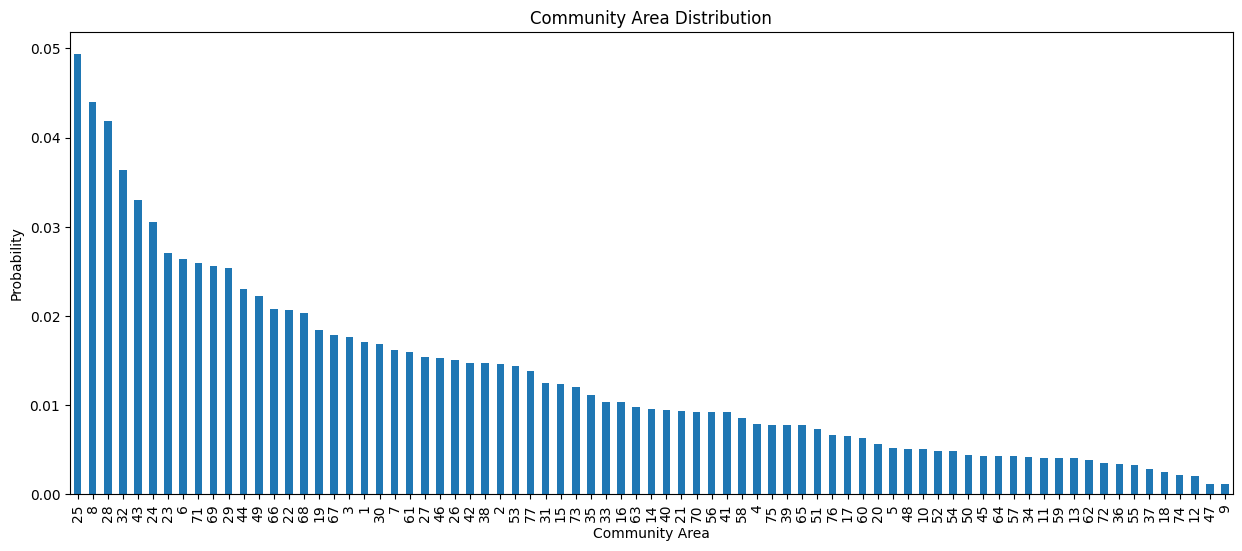

In [ ]:
plt.figure(figsize=(15, 6))
df['Community Area'].value_counts(normalize=True).plot(kind='bar')
plt.title('Community Area Distribution')
plt.ylabel('Probability')
plt.xlabel('Community Area')
plt.show()

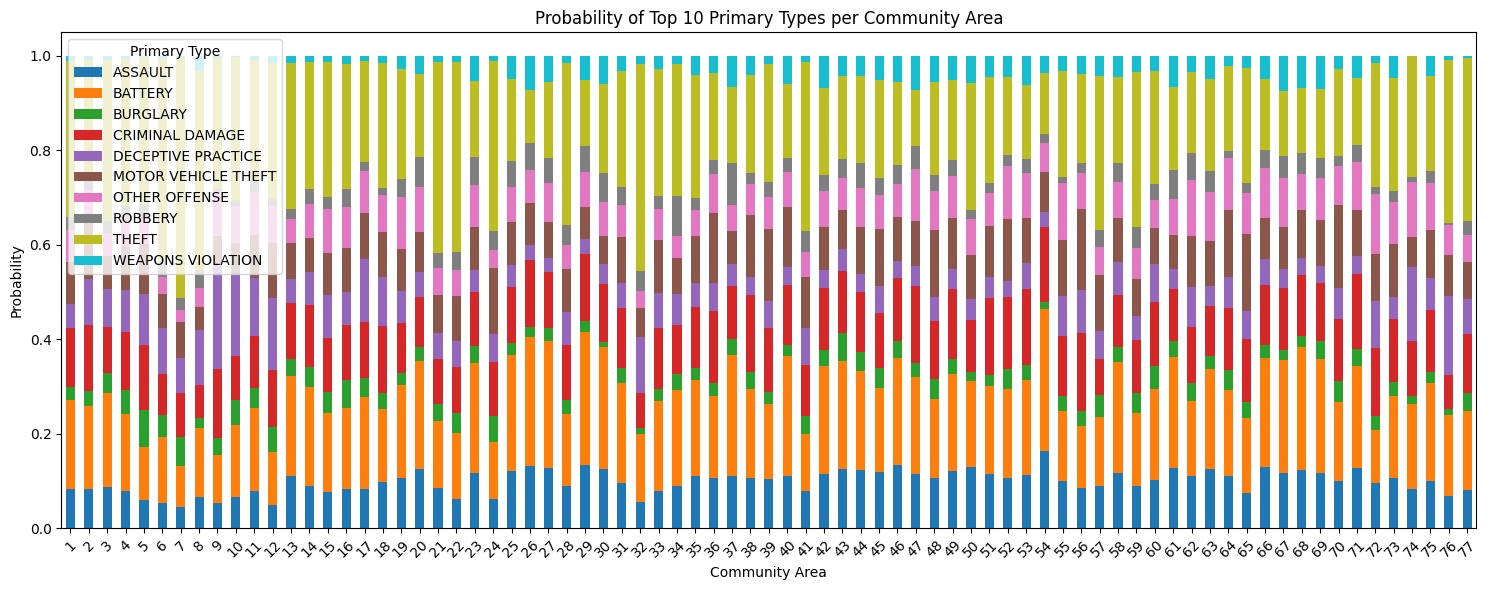

In [ ]:
top_10_types = df['Primary Type'].value_counts().nlargest(10).index
df_top_10 = df[df['Primary Type'].isin(top_10_types)]
community_area_probabilities = df_top_10.groupby(['Community Area', 'Primary Type']).size().unstack(fill_value=0)
community_area_probabilities = community_area_probabilities.div(community_area_probabilities.sum(axis=1), axis=0)
community_area_probabilities.plot(kind='bar', stacked=True, figsize=(15, 6))
plt.title('Probability of Top 10 Primary Types per Community Area')
plt.xlabel('Community Area')
plt.ylabel('Probability')
plt.xticks(rotation=45)
plt.legend(title='Primary Type')
plt.tight_layout()
plt.show()

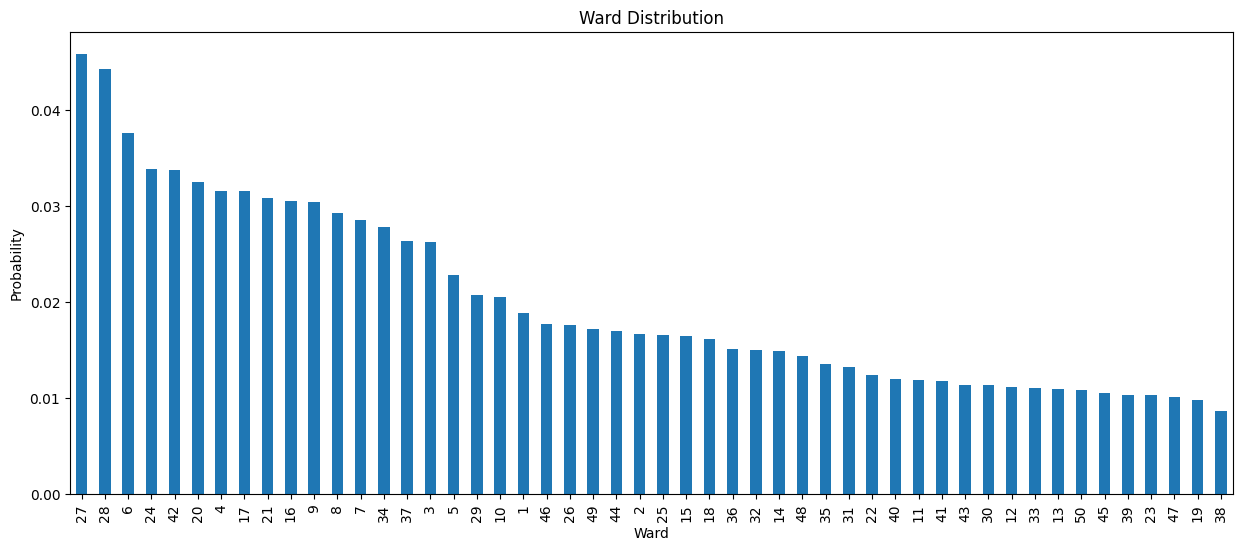

In [ ]:
plt.figure(figsize=(15, 6))
df['Ward'].value_counts(normalize=True).plot(kind='bar')
plt.title('Ward Distribution')
plt.ylabel('Probability')
plt.xlabel('Ward')
plt.show()

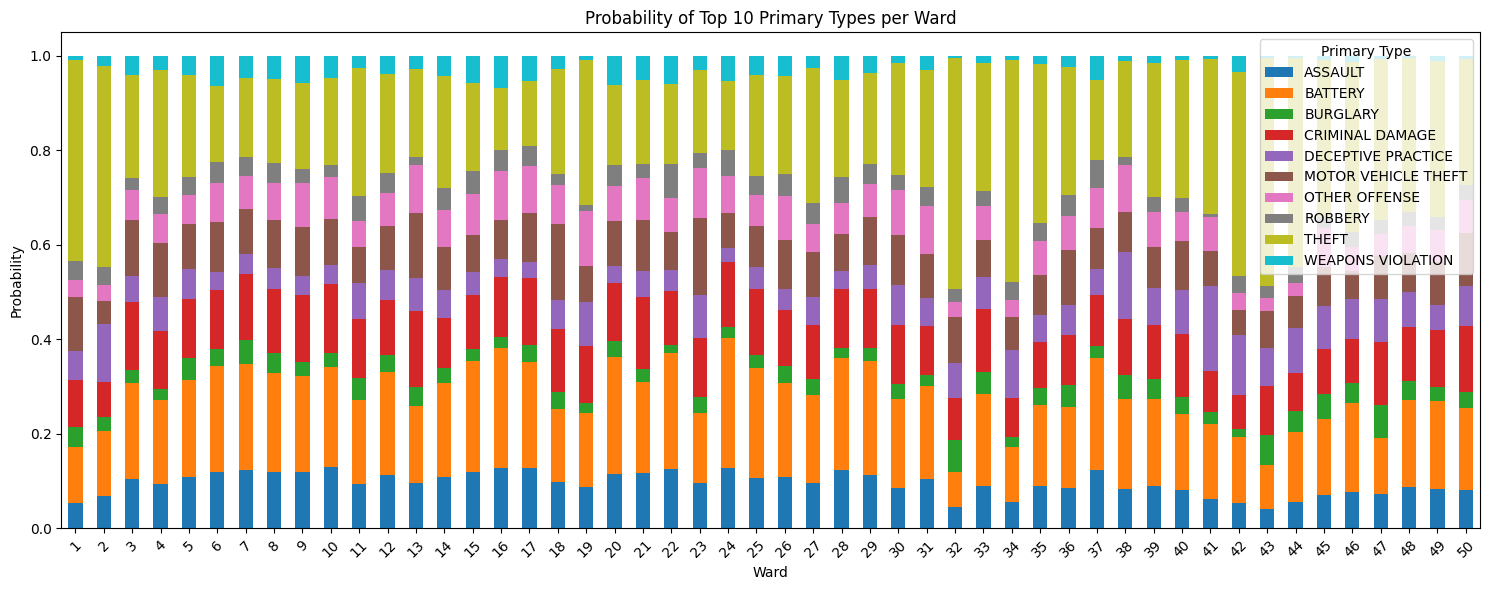

In [ ]:
top_10_types = df['Primary Type'].value_counts().nlargest(10).index
df_top_10 = df[df['Primary Type'].isin(top_10_types)]
ward_prob = df_top_10.groupby(['Ward', 'Primary Type']).size().unstack(fill_value=0)
ward_prob = ward_prob.div(ward_prob.sum(axis=1), axis=0)
ward_prob.plot(kind='bar', stacked=True, figsize=(15, 6))
plt.title('Probability of Top 10 Primary Types per Ward')
plt.xlabel('Ward')
plt.ylabel('Probability')
plt.xticks(rotation=45)
plt.legend(title='Primary Type')
plt.tight_layout()
plt.show()

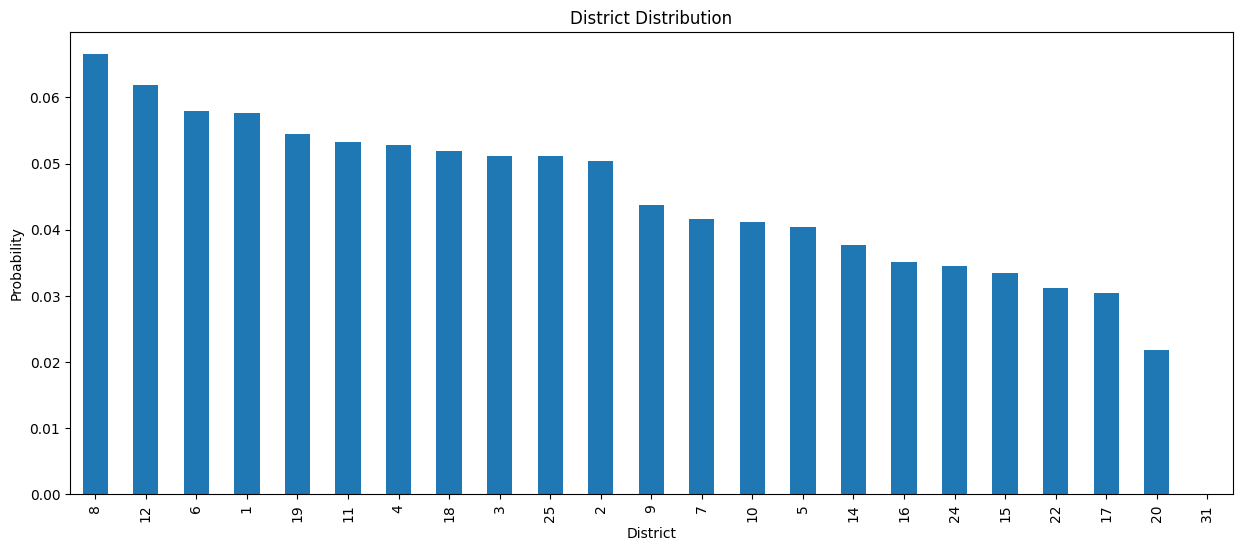

In [ ]:
plt.figure(figsize=(15, 6))
df['District'].value_counts(normalize=True).plot(kind='bar')
plt.title('District Distribution')
plt.ylabel('Probability')
plt.xlabel('District')
plt.show()

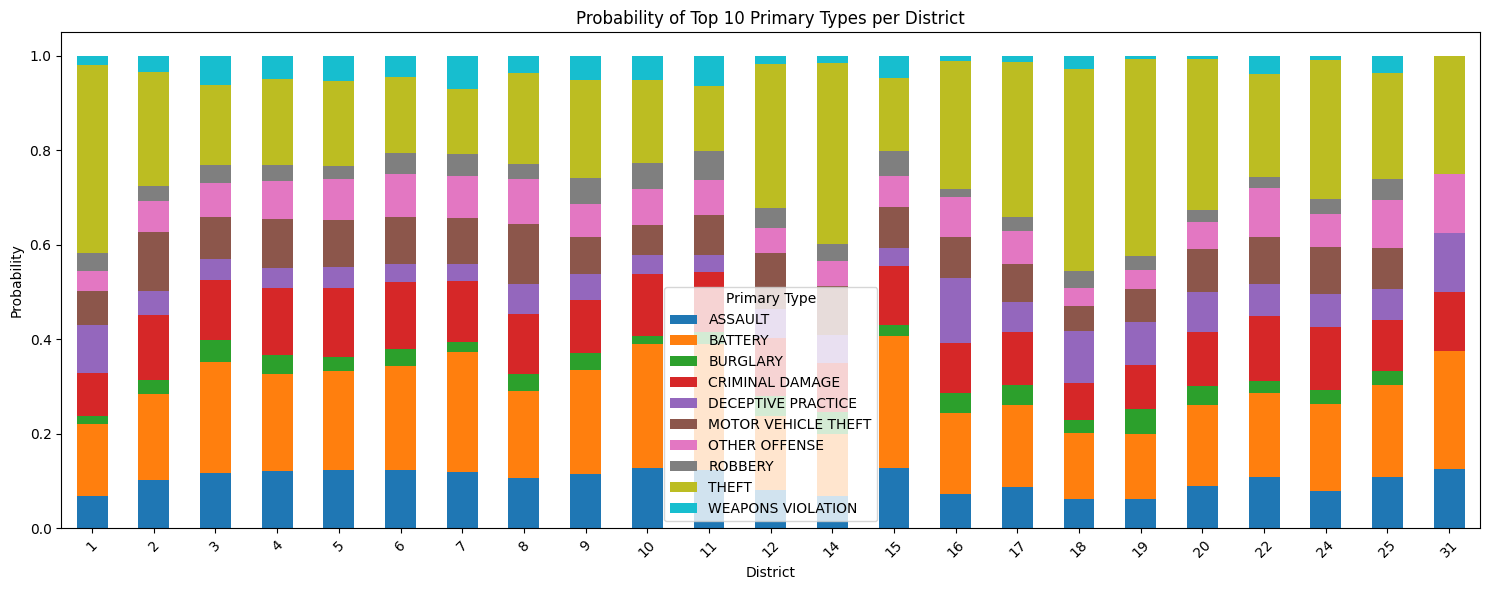

In [ ]:
top_10_types = df['Primary Type'].value_counts().nlargest(10).index
df_top_10 = df[df['Primary Type'].isin(top_10_types)]
district_prob = df_top_10.groupby(['District', 'Primary Type']).size().unstack(fill_value=0)
district_prob = district_prob.div(district_prob.sum(axis=1), axis=0)
district_prob.plot(kind='bar', stacked=True, figsize=(15, 6))
plt.title('Probability of Top 10 Primary Types per District')
plt.xlabel('District')
plt.ylabel('Probability')
plt.xticks(rotation=45)
plt.legend(title='Primary Type')
plt.tight_layout()
plt.show()

#### 2.5 Holiday

This section examines crime patterns during holidays. While holidays represent a smaller portion of the year, our analysis indicates that crime type distribution remains relatively consistent regardless of holiday observance.

Text(0, 0.5, 'Probability')

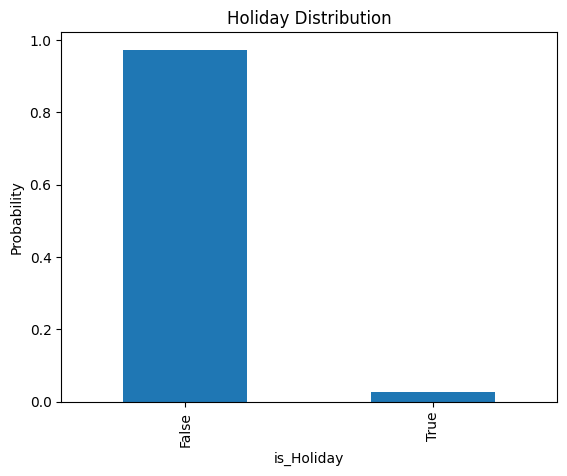

In [ ]:
df['is_Holiday'].value_counts(normalize=True).plot(kind='bar')
plt.title('Holiday Distribution')
plt.ylabel('Probability')

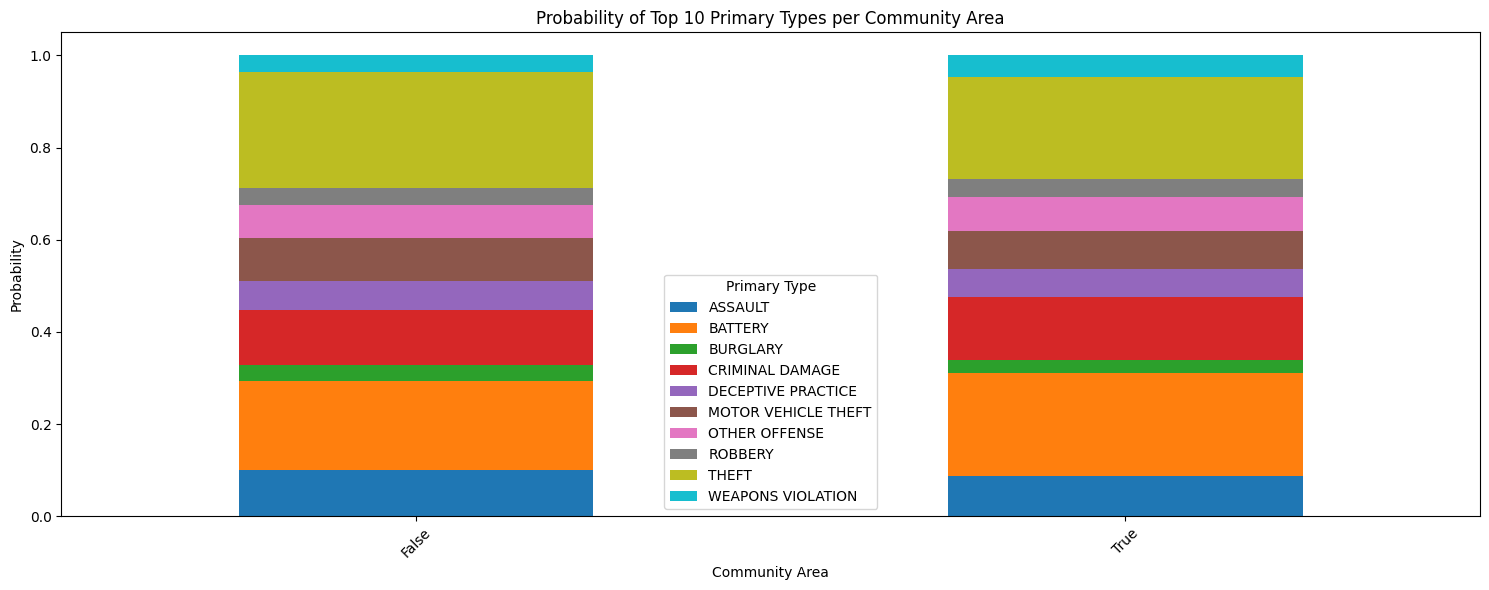

In [ ]:
top_10_types = df['Primary Type'].value_counts().nlargest(10).index
df_top_10 = df[df['Primary Type'].isin(top_10_types)]
community_area_probabilities = df_top_10.groupby(['is_Holiday', 'Primary Type']).size().unstack(fill_value=0)
community_area_probabilities = community_area_probabilities.div(community_area_probabilities.sum(axis=1), axis=0)
community_area_probabilities.plot(kind='bar', stacked=True, figsize=(15, 6))
plt.title('Probability of Top 10 Primary Types per Community Area')
plt.xlabel('Community Area')
plt.ylabel('Probability')
plt.xticks(rotation=45)
plt.legend(title='Primary Type')
plt.tight_layout()
plt.show()

#### 2.6 Crimes by Hour of the Day

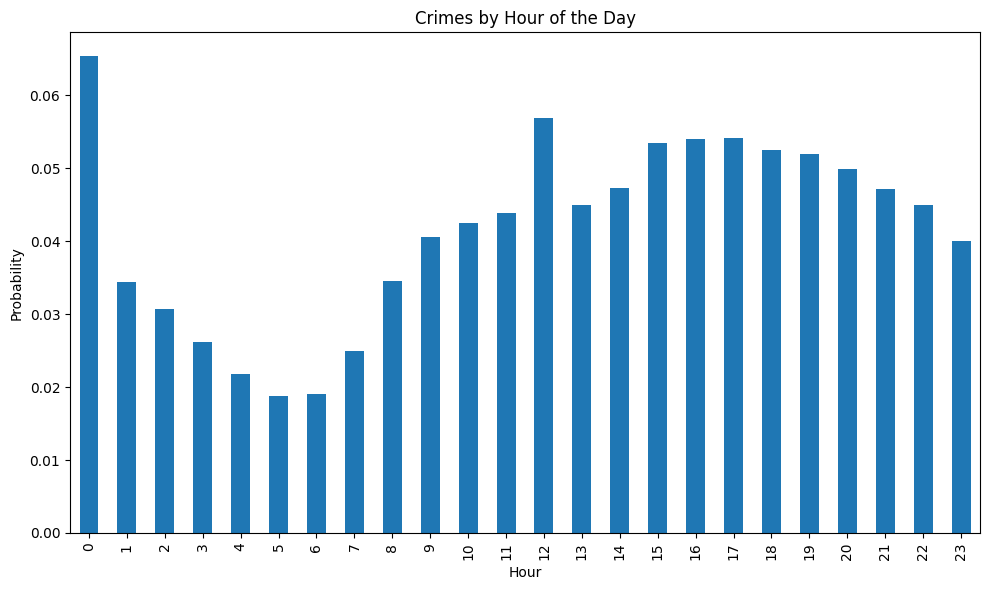

In [ ]:
plt.figure(figsize=(10, 6))
df['Hour'].value_counts(normalize=True).sort_index().plot(kind='bar')
plt.title('Crimes by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Probability')
plt.tight_layout()
plt.show()

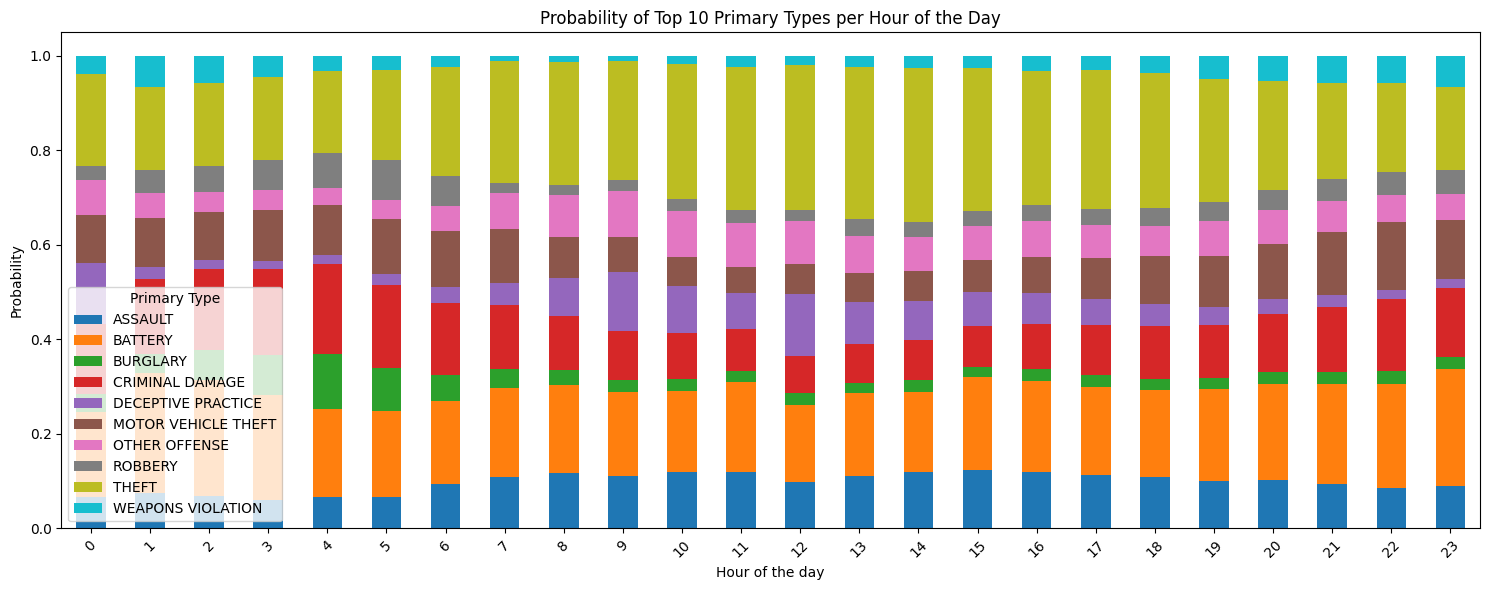

In [ ]:
top_10_types = df['Primary Type'].value_counts().nlargest(10).index
df_top_10 = df[df['Primary Type'].isin(top_10_types)]
hour_prob = df_top_10.groupby(['Hour', 'Primary Type']).size().unstack(fill_value=0)
hour_prob = hour_prob.div(hour_prob.sum(axis=1), axis=0)
hour_prob.plot(kind='bar', stacked=True, figsize=(15, 6))
plt.title('Probability of Top 10 Primary Types per Hour of the Day')
plt.xlabel('Hour of the day')
plt.ylabel('Probability')
plt.xticks(rotation=45)
plt.legend(title='Primary Type')
plt.tight_layout()
plt.show()